In [ ]:
#Value iteration on gambler’s problem.

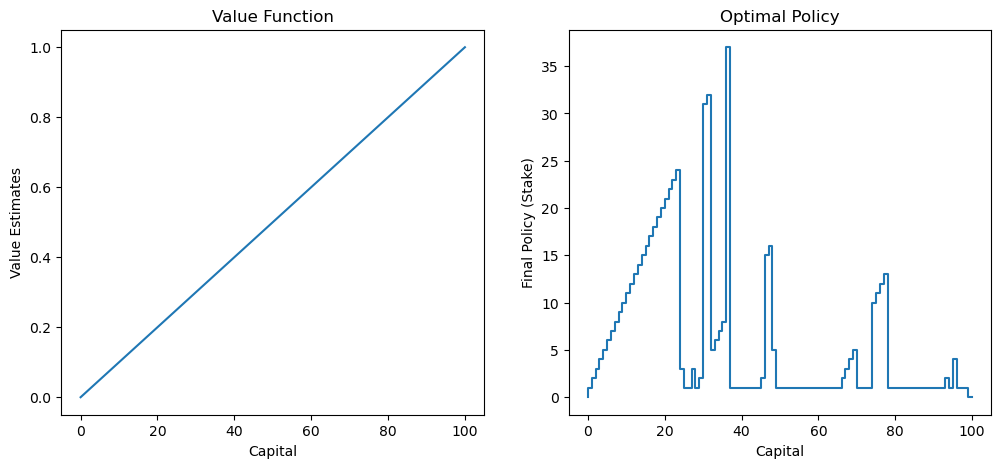

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S = 100  # Maximum capital
p_h = 0.5  # Probability of heads
theta = 1e-9  # Convergence threshold

# Value function initialization
V = np.zeros(S + 1)
V[S] = 1  # Terminal state

# Value Iteration
while True:
    delta = 0
    for s in range(1, S):
        actions = np.arange(1, min(s, S - s) + 1)
        values = [p_h * V[s + a] + (1 - p_h) * V[s - a] for a in actions]
        new_value = max(values)
        delta = max(delta, abs(V[s] - new_value))
        V[s] = new_value
    if delta < theta:
        break

# Extract policy
policy = np.zeros(S + 1, dtype=int)
for s in range(1, S):
    actions = np.arange(1, min(s, S - s) + 1)
    action_values = [p_h * V[s + a] + (1 - p_h) * V[s - a] for a in actions]
    policy[s] = actions[np.argmax(action_values)]

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(V)
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value Function')

plt.subplot(1, 2, 2)
plt.step(range(S + 1), policy)
plt.xlabel('Capital')
plt.ylabel('Final Policy (Stake)')
plt.title('Optimal Policy')
plt.show()
